In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import cluster

np.random.seed(42)

In [2]:
header = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length_g', 'type']
seeds = pd.read_csv('seeds_dataset.txt', delimiter='\t+', names=header, engine='python')

In [3]:
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry,length_g,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(seeds)
seeds_small = pca.transform(seeds)

# Обучаем K-means и сравниваем метки
km = KMeans(n_clusters=3, n_jobs=-1)
pred_small = km.fit_predict(seeds_small)

seed_target = np.array(seeds.type)
seed_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [5]:
pred_small

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
for i in range(len(seed_target)):
    if seed_target[i] == 1:
        seed_target[i] = 2
    elif seed_target[i] == 3:
        seed_target[i] = 0
    else:
        seed_target[i] = 1

Text(0.5, 1.0, 'Предсказания')

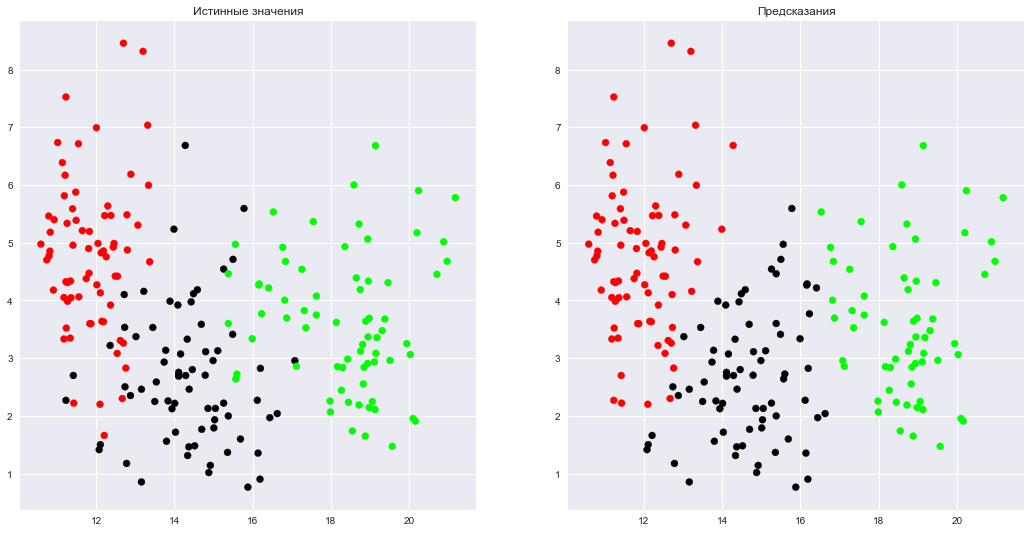

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(18, 9))
 
colormap = np.array(['red', 'lime', 'black'])
 
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[seed_target])
plt.title('Истинные значения')
 
plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[pred_small])
plt.title('Предсказания')

In [8]:
#Понятие аккуратности к кластеризации не относится, но все равно глянем и сравним
print('Accuracy of clustering is ' + '{}{}'.format(round(100*sum(pred_small == seed_target) / len(seed_target), 2), '%'))

Accuracy of clustering is 90.48%


## Иерархическая

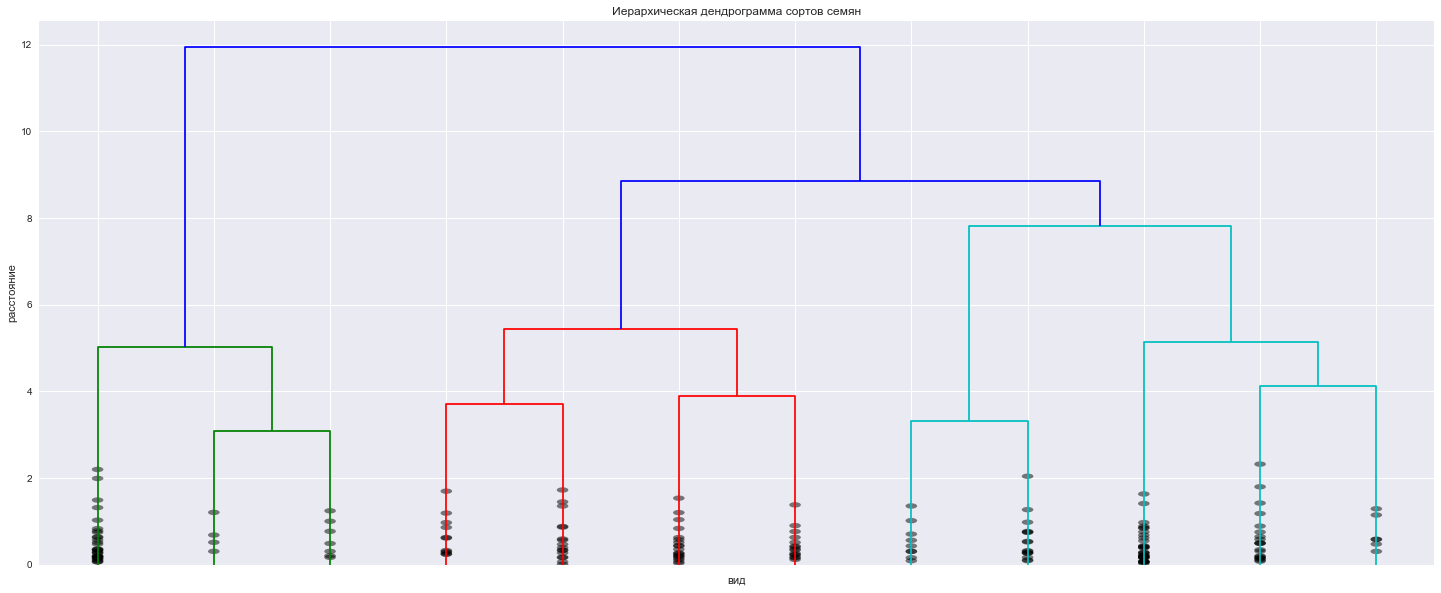

In [9]:
#Обучение
distances = pdist(seeds_small, "euclidean")
ie = linkage(seeds_small, method="complete")

#Дендрограмма
fig = plt.figure(figsize=(25, 10))
plt.title("Иерархическая дендрограмма сортов семян")
plt.xlabel("вид")
plt.ylabel("расстояние")
dn = dendrogram(ie,
    truncate_mode="lastp", 
    p=12,  
    show_leaf_counts=False, 
    show_contracted=True)

In [10]:
cutree = cluster.hierarchy.cut_tree(ie, n_clusters=[3])
tree_target = np.array(cutree)
tree_target

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
    

## DBSCAN

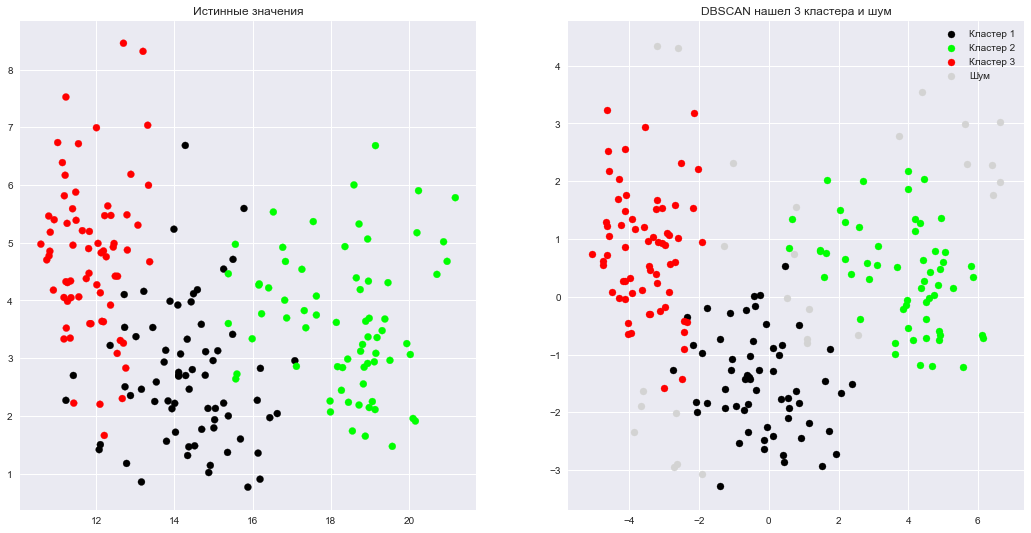

In [11]:
# Определяем модель
dbscan = DBSCAN(eps=1.08, min_samples=7, algorithm='brute')

#Уменьшаем размерность
pca = PCA(n_components=2).fit(seeds)
pca_2d = pca.transform(seeds)
 
# Обучаем
dbscan.fit(seeds)

# Строим график
fig = plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[seed_target])
plt.title('Истинные значения')
 
plt.subplot(1, 2, 2)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='black')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='lime')
    elif dbscan.labels_[i] == 2:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='red')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='lightgrey')
 
plt.legend([c1, c2, c4, c3], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Шум'])
plt.title('DBSCAN нашел 3 кластера и шум')
plt.show()

In [12]:
#Посмотрим на аккуратность
dbscan.labels_ = np.flipud(dbscan.labels_) 
print('Accuracy of clustering is ' + '{}{}'.format(round(100*sum(dbscan.labels_ == seed_target) / len(seed_target), 2), '%'))

Accuracy of clustering is 87.62%
